In [6]:
import numpy as np
import sys
import re
import os
import cygnus_lib as cy
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line, resize, rescale)
import scipy.ndimage
from skimage.transform import hough_circle, hough_circle_peaks
from scipy.stats import norm
import scipy.stats as stats

import pandas as pd
import pickle
import time
from IPython import display

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
plt.rcParams['font.serif'] = ['Bitstream Vera Sans']
x_resolution = y_resolution = 2048
from itertools import combinations
import os
import requests
import ROOT
import root_numpy as rtnp
ROOT.gROOT.SetBatch(True)

In [7]:
dataSelection = 'LAB'
runI = [3555]
start_image_to_read = 0
max_image_to_read = 0
for nRi in range(0,len(runI)):
#############  mean and sigma file generator ############################
    try:
        print ('Download and open file: '+cy.swift_root_file(dataSelection, runI[nRi]))
        tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, runI[nRi]))
        print ('Open file: '+tmp_file)
        f  = ROOT.TFile.Open(tmp_file);
        print ('Find Keys: '+str(len(f.GetListOfKeys())))
        pic, wfm = cy.root_TH2_name(f)
        max_image = len(pic)
        max_wfm = len(wfm)
        print ("# of Images (TH2) Files: %d " % (max_image))
        print ("# of Waveform (TH2) Files: %d " % (max_wfm))
        nImag=max_image
    
    except:
        print ("ERROR: No file %d" % (runI[nRi]))
        break
    if max_image_to_read != 0:
        nImag = max_image_to_read   
    print ("WARNING: data will be anlyzed from %d to %d" % (start_image_to_read, nImag))
    
    m_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)
    s_image = np.zeros((x_resolution, y_resolution), dtype=np.float64)

    n0 = 0
    for iTr in range(start_image_to_read, nImag):

        if iTr % 50 == 0:
            print (iTr, ' >> Close and re-Open: ', tmp_file)
            f.Close()
            f  = ROOT.TFile.Open(tmp_file);

        image = rtnp.hist2array(f.Get(pic[iTr])).T
        m_image += image
        s_image += image**2 
        if n0 > 0:  # print progress and debung info for poit 200, 200...
            print ("Image[200,200]: %d => %.2f %.2f %.2f " % (iTr,
                                             image[200,200],
                                             np.sqrt((s_image[200,200] - 
                                                     m_image[200,200]**2 
                                                      / (n0+1)) / n0),
                                             m_image[200,200]/(n0+1),
                                             ))
        n0 += 1
    m_image = m_image/n0
    s_image = np.sqrt((s_image - m_image**2 * n0) / (n0 - 1))
    
###### print Info and Save OutPut ######################################
    
    print ("sigma %f" % (s_image[200,200]))
    fileoutm = ("./data/run%d_mean.h5" % (runI[nRi]))
    cy.write_image_h5(fileoutm, m_image)
    fileouts = ("./data/run%d_sigma.h5" % (runI[nRi]))
    cy.write_image_h5(fileouts, s_image)
    print("DONE OUTPUT on files: %s, %s", (fileoutm, fileouts))
    if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03555.root


  0.9%   3555328 / 413741706

  1.9%   7749632 / 413741706

  2.9%  12132352 / 413741706

  3.9%  16310272 / 413741706

  5.0%  20684800 / 413741706

  6.0%  24920064 / 413741706

  7.1%  29450240 / 413741706

  8.6%  35545088 / 413741706

 10.1%  41836544 / 413741706

 11.6%  47980544 / 413741706

 13.1%  54222848 / 413741706

 14.5%  60162048 / 413741706

 16.0%  66150400 / 413741706

 17.6%  72728576 / 413741706

 19.1%  78913536 / 413741706

 20.6%  85213184 / 413741706

 22.1%  91357184 / 413741706

 23.6%  97648640 / 413741706

 25.1% 103874560 / 413741706

 26.7% 110264320 / 413741706

 28.2% 116506624 / 413741706

 29.7% 122830848 / 413741706

 31.2% 129204224 / 413741706

 32.7% 135299072 / 413741706

 34.3% 141828096 / 413741706

 35.8% 148119552 / 413741706

 37.3% 154525696 / 413741706

 38.9% 160792576 / 413741706

 40.4% 167133184 / 413741706

 41.9% 173514752 / 413741706

 43.5% 179855360 / 413741706

 45.0% 186081280 / 413741706

 46.5% 192192512 / 413741706

 48.0% 198508544 / 413741706

 49.5% 204816384 / 413741706

 51.0% 210870272 / 413741706

 52.5% 217153536 / 413741706

 54.0% 223510528 / 413741706

 55.5% 229679104 / 413741706

 57.0% 235888640 / 413741706

 58.0% 240164864 / 413741706

 59.1% 244473856 / 413741706

 60.1% 248864768 / 413741706

 61.2% 253272064 / 413741706

 62.3% 257769472 / 413741706

 63.3% 261939200 / 413741706

 64.3% 266174464 / 413741706

 65.4% 270483456 / 413741706

 66.4% 274726912 / 413741706

 67.4% 279052288 / 413741706

 68.5% 283320320 / 413741706

 69.5% 287555584 / 413741706

 70.5% 291667968 / 413741706

 71.5% 295829504 / 413741706

 72.5% 299933696 / 413741706

 73.5% 304144384 / 413741706

 74.7% 308944896 / 413741706

 76.1% 314990592 / 413741706

 77.5% 320856064 / 413741706

 79.0% 326844416 / 413741706

 80.5% 332873728 / 413741706

 81.9% 338919424 / 413741706

 83.4% 344956928 / 413741706

 84.8% 350953472 / 413741706

 86.3% 357031936 / 413741706

 87.8% 363249664 / 413741706

 89.3% 369410048 / 413741706

 90.8% 375578624 / 413741706

 92.3% 381763584 / 413741706

 93.8% 387899392 / 413741706

 95.2% 394027008 / 413741706

 96.7% 400203776 / 413741706

 98.2% 406413312 / 413741706

 99.7% 412672000 / 413741706

100.0% 413745152 / 413741706


Open file: ./tmp.29415.root
Find Keys: 312
# of Images (TH2) Files: 104 
# of Waveform (TH2) Files: 104 
0  >> Close and re-Open:  ./tmp.29415.root
Image[200,200]: 1 => 97.00 2.12 98.50 
Image[200,200]: 2 => 100.00 1.73 99.00 
Image[200,200]: 3 => 98.00 1.50 98.75 
Image[200,200]: 4 => 100.00 1.41 99.00 
Image[200,200]: 5 => 120.00 8.67 102.50 
Image[200,200]: 6 => 96.00 8.28 101.57 
Image[200,200]: 7 => 97.00 7.84 101.00 
Image[200,200]: 8 => 98.00 7.40 100.67 
Image[200,200]: 9 => 117.00 8.68 102.30 
Image[200,200]: 10 => 100.00 8.26 102.09 
Image[200,200]: 11 => 105.00 7.92 102.33 
Image[200,200]: 12 => 97.00 7.73 101.92 
Image[200,200]: 13 => 119.00 8.72 103.14 
Image[200,200]: 14 => 96.00 8.60 102.67 
Image[200,200]: 15 => 98.00 8.39 102.38 
Image[200,200]: 16 => 98.00 8.19 102.12 
Image[200,200]: 17 => 106.00 8.00 102.33 
Image[200,200]: 18 => 100.00 7.79 102.21 
Image[200,200]: 19 => 97.00 7.67 101.95 
Image[200,200]: 20 => 98.00 7.53 101.76 
Image[200,200]: 21 => 97.00 7.42 101

In [4]:
if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")

/bin/rm: cannot remove ‘./tmp.29415.root’: No such file or directory


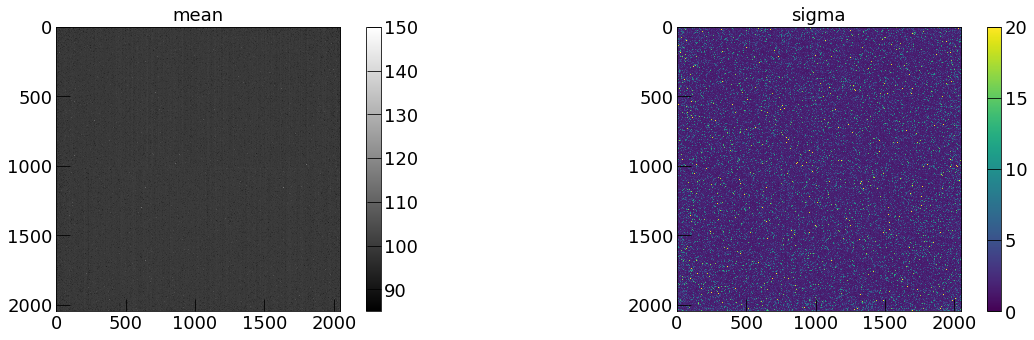

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


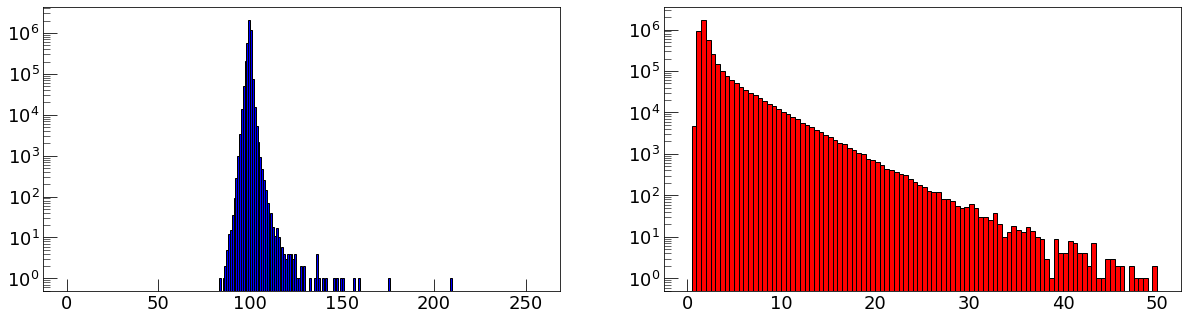

In [5]:
cy.set_atlas_style('long')
run = 1748# 2340
try:
    fileoutm = ("./data/run%d_mean.h5" % (run))
    imagem = cy.read_image_h5(fileoutm)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)
try: 
    fileouts = ("./data/run%d_sigma.h5" % (run))
    images = cy.read_image_h5(fileouts)
except:
    print ("No file for run %s, run script runs-pedestals.ipynb" % run)


fig, ax = plt.subplots(1,2)
im = ax[0].imshow(imagem, cmap="gray", vmin=85,vmax=150)
fig.colorbar(im, ax=ax[0])
ax[0].set_title("mean")
ax[1].set_title("sigma")
im = ax[1].imshow(images, vmin=0,vmax=20)
fig.colorbar(im, ax=ax[1])
plt.show()
fig, ax = plt.subplots(1,2)
ax[0].hist(imagem.ravel(), bins=256, range=(0.0, 256.0), fc='b', ec='k')
ax[1].hist(images.ravel(), bins=100, range=(0.0, 50.0), fc='r', ec='k')
ax[0].set_yscale("log")
ax[1].set_yscale("log")

plt.show()